In [2]:
import os,sys,shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import easyocr

# from paddleocr import PaddleOCR, draw_ocr

In [27]:
# Specify language to identify from images
reader = easyocr.Reader(['en','nl'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [13]:
# Load images
images = [cv2.imread(file) for file in glob.glob("Data/StreetSwipe/images_classified/*/*.jpg")]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images] # correct the color channel
print(f"Total number of images: {len(images)}")

Total number of images: 2441


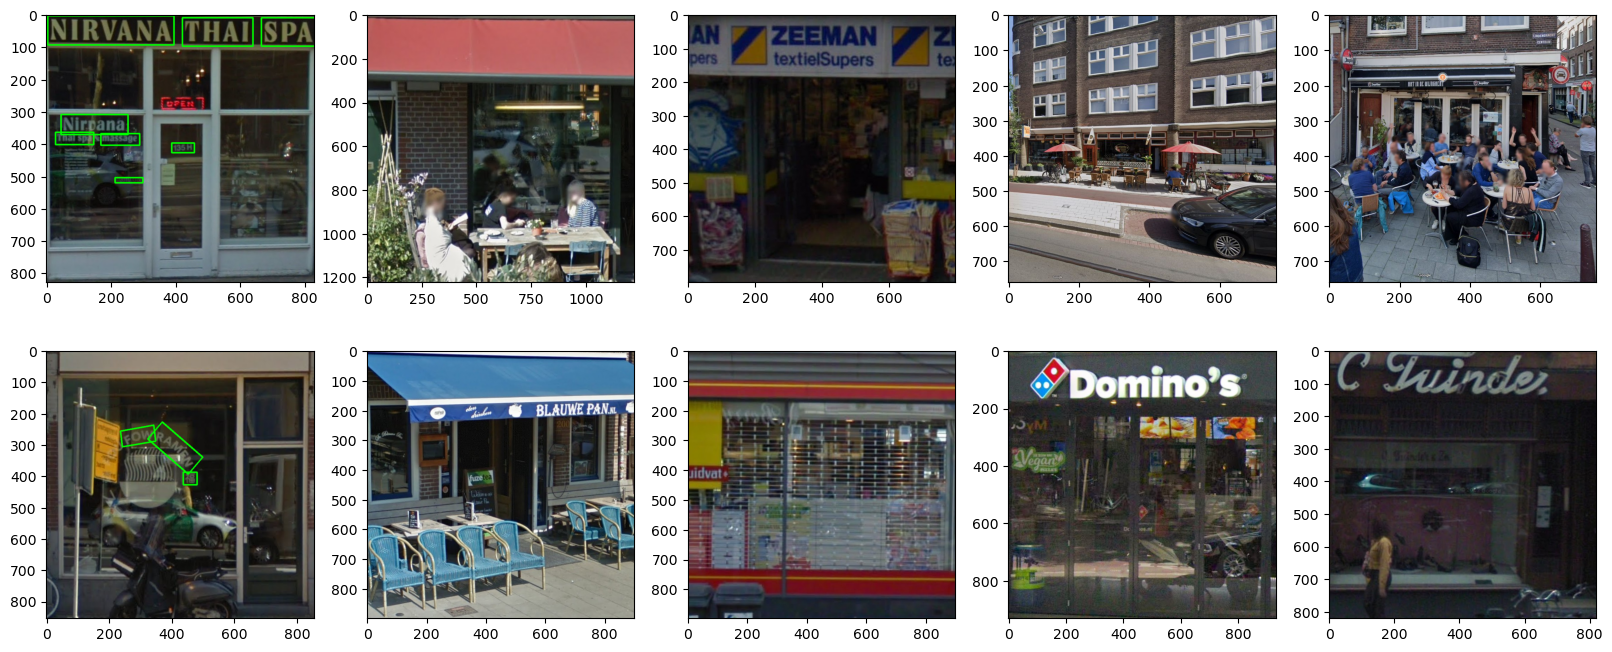

In [53]:
# Sample image
test_imgs = [images[i] for i in np.random.randint(2441, size=(10))]

fig = plt.figure(figsize=(20,8))
rows, cols = 2, 5

for i in range(0, cols*rows):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(test_imgs[i])
plt.show()

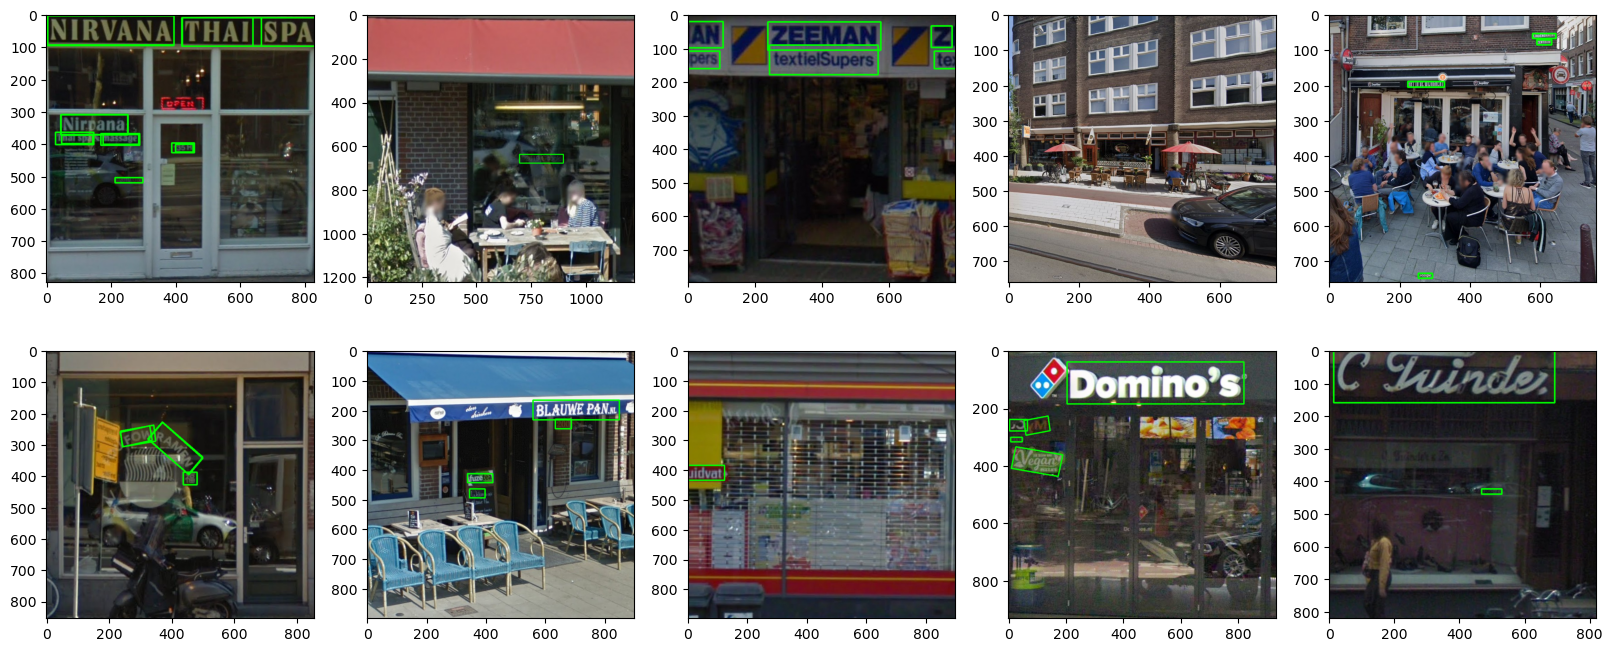

In [54]:
fig = plt.figure(figsize=(20,8))
rows, cols = 2, 5

for i in range(0, cols*rows):
    fig.add_subplot(rows, cols, i+1)

    result = reader.detect(test_imgs[i])

    result_vis = test_imgs[i]
    spacer = 100

    for box in result[0][0]: 
        top_left = (box[0], box[2])
        bottom_right = (box[1], box[3])
        result_vis = cv2.rectangle(result_vis, top_left, bottom_right, (0,255,0), 3)
        spacer+=15

    for box in result[1][0]: 
        points = np.array(box, dtype=np.int32)
        result_vis = cv2.polylines(result_vis, [points], isClosed=True, color=(0,255,0), thickness=3)
        spacer+=15

    plt.imshow(result_vis)
plt.show()

## Detect and crop out all text regions

In [6]:
# make folders for cropped-out texts
class_names = ['gentrified','non-gentrified']
new_folder = 'Data/StreetSwipe/images_cropped'

for name in class_names:
    os.makedirs(os.path.join(new_folder, name))

### Gentrified

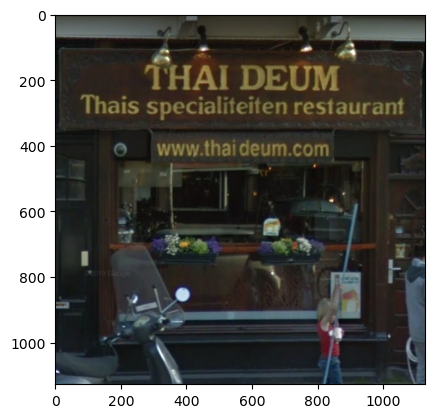

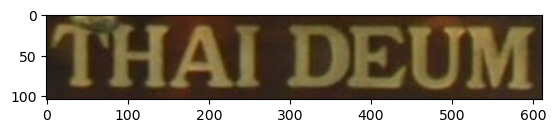

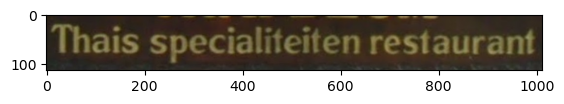

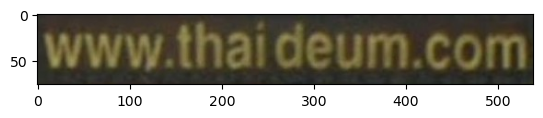

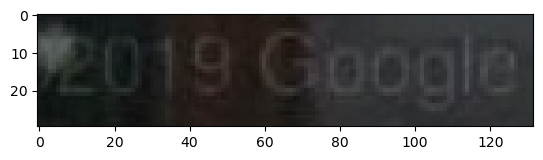

In [126]:
test = images[2422]
plt.imshow(test)
plt.show()

result1 = reader.detect(test)
result1

# Crop text regions
for box in result1[0][0]: 
    tl = (box[0], box[2])
    br = (box[1], box[3])
    cropped_rec = test[tl[1]:br[1], tl[0]:br[0]]
    plt.imshow(cropped_rec)
    plt.show()

for box in result1[1][0]: 
    x = [] ; y = []
    for point in box:
        x.append(int(point[0]))
        y.append(int(point[1]))
    tl_x = min(x); tl_y = min(y)
    br_x = max(x); br_y = max(y)
    cropped_poly = test[tl_y:br_y, tl_x:br_x]
    plt.imshow(cropped_poly)
    plt.show()


In [12]:
for file in glob.glob("Data/StreetSwipe/images_classified/gentrified/*.jpg"):
    filename = os.path.split(file)[1]
    # Read img
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Detect texts
    result = reader.detect(img)

    # Crop text regions
    for box in result[0][0]: 
        tl = (box[0], box[2])
        br = (box[1], box[3])
        cropped_rec = img[tl[1]:br[1], tl[0]:br[0]]
        des_path = os.path.join(f'Data/StreetSwipe/images_cropped/gentrified/', filename + 'rec_{i}.jpg')
        cv2.imwrite(des_path, cropped_rec)

    for box in result[1][0]: 
        x = []; y = []
        for point in box:
            x.append(int(point[0]))
            y.append(int(point[1]))
        tl_x = min(x); tl_y = min(y)
        br_x = max(x); br_y = max(y)
        cropped_poly = img[tl_y:br_y, tl_x:br_x]
        des_path = os.path.join(f'Data/StreetSwipe/images_cropped/gentrified/', filename + 'poly_{i}.jpg')
        cv2.imwrite(des_path, cropped_poly)
    

    # print(os.path.split(file)[1])

[[[35 33 44]
  [35 33 44]
  [34 34 42]
  ...
  [45 54 61]
  [45 54 61]
  [45 54 61]]

 [[35 33 44]
  [35 34 42]
  [34 34 42]
  ...
  [49 58 65]
  [49 58 65]
  [48 57 64]]

 [[33 33 41]
  [34 34 42]
  [35 35 43]
  ...
  [51 60 67]
  [50 59 66]
  [50 59 66]]

 ...

 [[55 53 41]
  [55 53 41]
  [55 53 41]
  ...
  [81 76 82]
  [80 75 79]
  [83 78 82]]

 [[57 55 42]
  [56 54 41]
  [55 53 40]
  ...
  [79 74 80]
  [81 76 80]
  [81 76 80]]

 [[57 55 42]
  [56 54 41]
  [55 53 40]
  ...
  [79 74 80]
  [80 75 79]
  [79 74 78]]]
[[[114 122 115]
  [114 121 115]
  [114 121 115]
  ...
  [130 137 131]
  [130 137 131]
  [130 137 131]]

 [[113 120 115]
  [113 120 114]
  [113 120 114]
  ...
  [130 138 131]
  [130 138 131]
  [130 138 131]]

 [[113 120 115]
  [112 119 114]
  [112 119 114]
  ...
  [130 138 131]
  [130 138 131]
  [130 138 131]]

 ...

 [[ 27  32  46]
  [ 28  34  48]
  [ 30  36  49]
  ...
  [116 125 128]
  [116 125 128]
  [116 125 128]]

 [[ 27  32  47]
  [ 29  34  48]
  [ 30  35  49]
  ...
  